In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns


# New Zealand data on Cigarette usage vs. cost over several years

In [174]:
# Load the data from the CSV file
data_path = '/content/NZ Cigarette VS Cost.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Year,Number per adult,Cost (1990$)
0,1973,2691,3.05
1,1974,2732,2.78
2,1975,2874,2.56
3,1976,2827,2.51
4,1977,2844,2.54


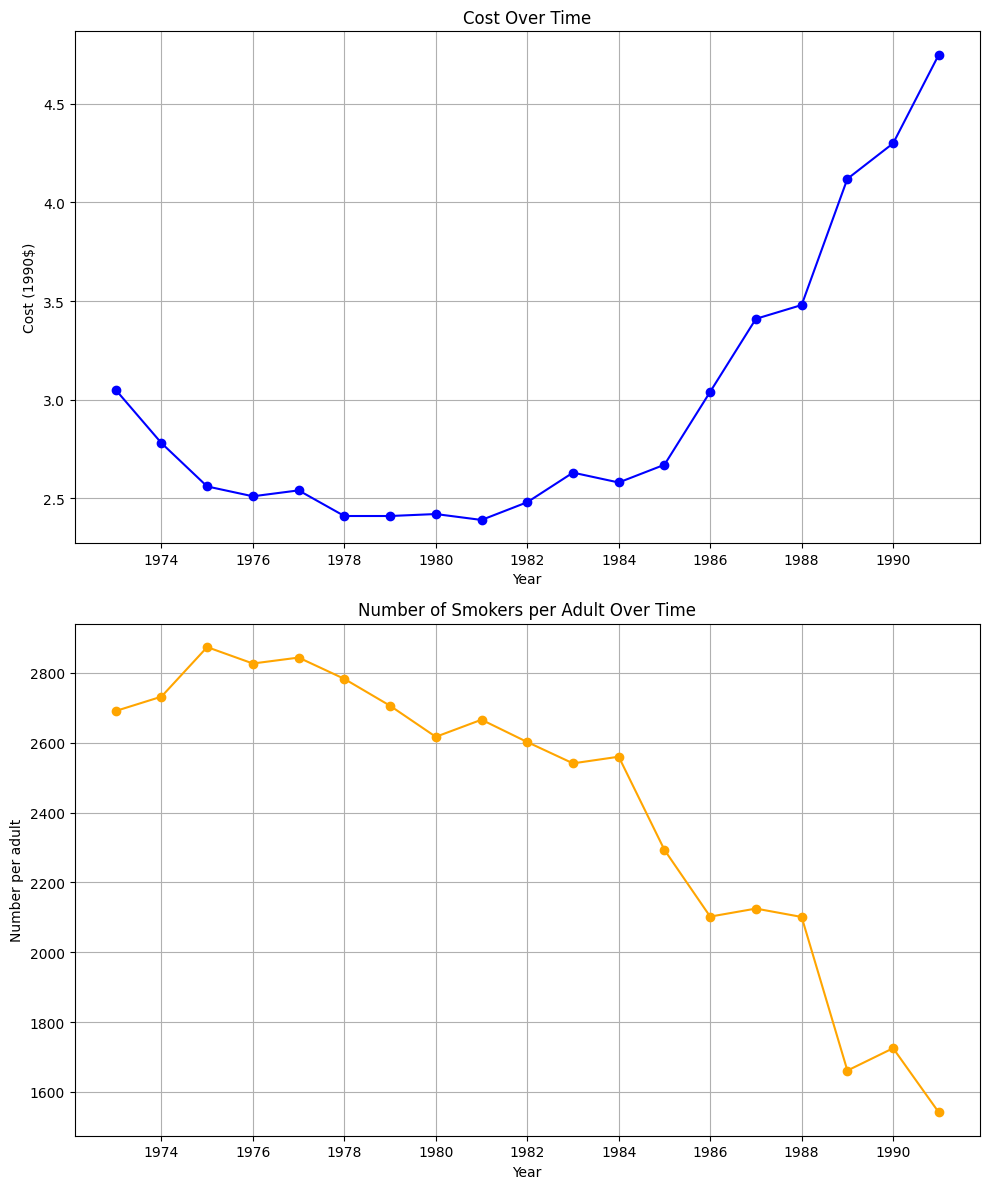

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot for Cost (1990$)
ax1.plot(data['Year'], data['Cost (1990$)'], color='blue', marker='o')
ax1.set_title('Cost Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cost (1990$)')
ax1.grid(True)
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure the x-axis labels are integers

# Plot for Number per Adult
ax2.plot(data['Year'], data['Number per adult'], color='orange', marker='o')
ax2.set_title('Number of Smokers per Adult Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number per adult')
ax2.grid(True)
ax2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure the x-axis labels are integers

plt.tight_layout()
plt.show()


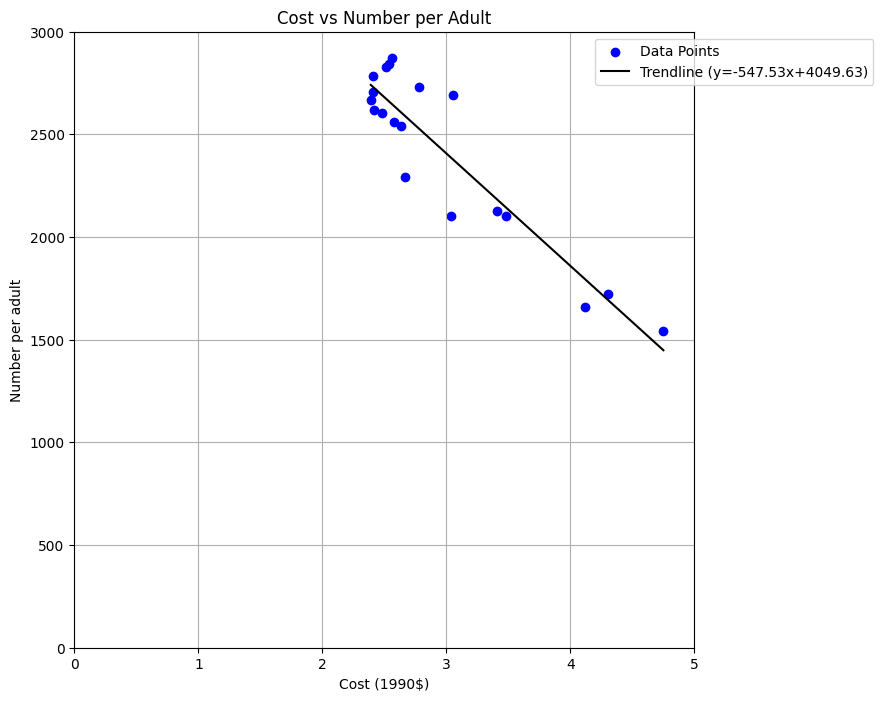

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(data['Cost (1990$)'], data['Number per adult'], color='blue', marker='o', label='Data Points')  # Circle markers

# Calculate coefficients for the linear trendline
slope, intercept = np.polyfit(data['Cost (1990$)'], data['Number per adult'], 1)

# Generate x-values for the trendline from the minimum to maximum of cost data
x_values = np.array([min(data['Cost (1990$)']), max(data['Cost (1990$)'])])

# Calculate y-values for the trendline based on the slope and intercept
y_values = slope * x_values + intercept

ax.plot(x_values, y_values, 'k-', label=f'Trendline (y={slope:.2f}x+{intercept:.2f})')
ax.set_xlabel('Cost (1990$)')
ax.set_ylabel('Number per adult')
ax.set_title('Cost vs Number per Adult')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Legend outside the plot
ax.grid(True)

# Set the axis range
ax.set_xlim(0, 5)
ax.set_ylim(0, 3000)

plt.show()


# Marriage and birth rates for NZ, UK, and US for several years

In [50]:
marriage_birth_rate =pd.read_csv('/content/marriage-birth-rates-unpivoted.csv')

In [51]:
marriage_birth_rate.head()

,Year,Marriage rate,Birth rate,Country
0,"January 1, 1974",8.4,19.5,NZ
1,"January 1, 1975",7.9,18.3,NZ
2,"January 1, 1976",7.7,17.6,NZ
3,"January 1, 1977",7.2,17.2,NZ
4,"January 1, 1978",7.1,16.2,NZ


In [52]:
marriage_birth_rate['Year'] = pd.to_datetime(marriage_birth_rate['Year']).dt.year

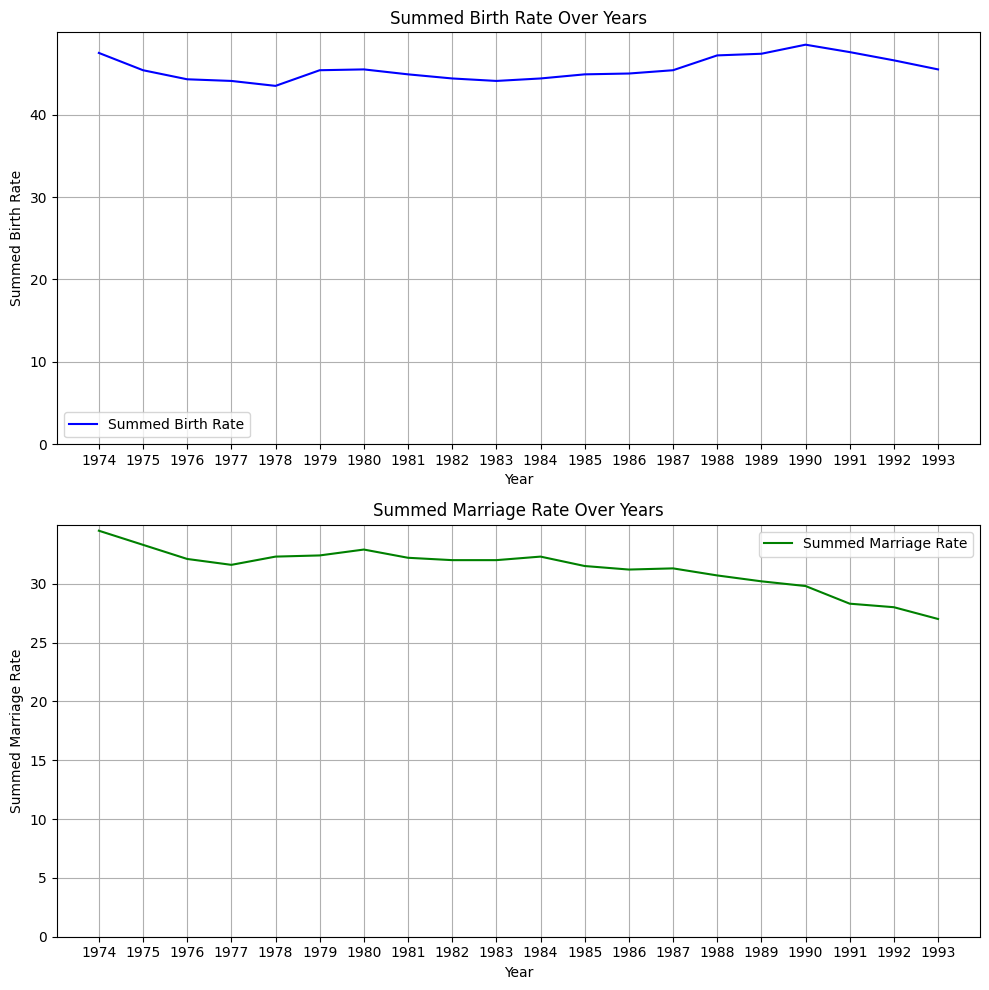

In [65]:

yearly_birth_rate_sum = marriage_birth_rate.groupby('Year')['Birth rate'].sum()
yearly_marriage_rate_sum = marriage_birth_rate.groupby('Year')['Marriage rate'].sum()

# Create a single figure to hold both subplots
plt.figure(figsize=(10, 10))  # Increase figure size to accommodate two subplots vertically

# Plotting the summed Birth Rates
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(yearly_birth_rate_sum.index, yearly_birth_rate_sum.values, label='Summed Birth Rate', color='blue')
plt.title('Summed Birth Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Summed Birth Rate')
plt.xticks(yearly_birth_rate_sum.index)  # Set x-axis to show every year
plt.yticks(range(0, 50, 10))  # Set y-axis from 0 to 50 with 10 as the interval
plt.ylim(0, 50)  # Set y-axis limits
plt.grid(True)
plt.legend()

# Plotting the summed Marriage Rates
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(yearly_marriage_rate_sum.index, yearly_marriage_rate_sum.values, label='Summed Marriage Rate', color='green')
plt.title('Summed Marriage Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Summed Marriage Rate')
plt.xticks(yearly_marriage_rate_sum.index)  # Set x-axis to show every year
plt.yticks(range(0, 35, 5))  # Set y-axis from 0 to 16 with 2 as the interval
plt.ylim(0, 35)  # Set y-axis limits
plt.grid(True)
plt.legend()

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


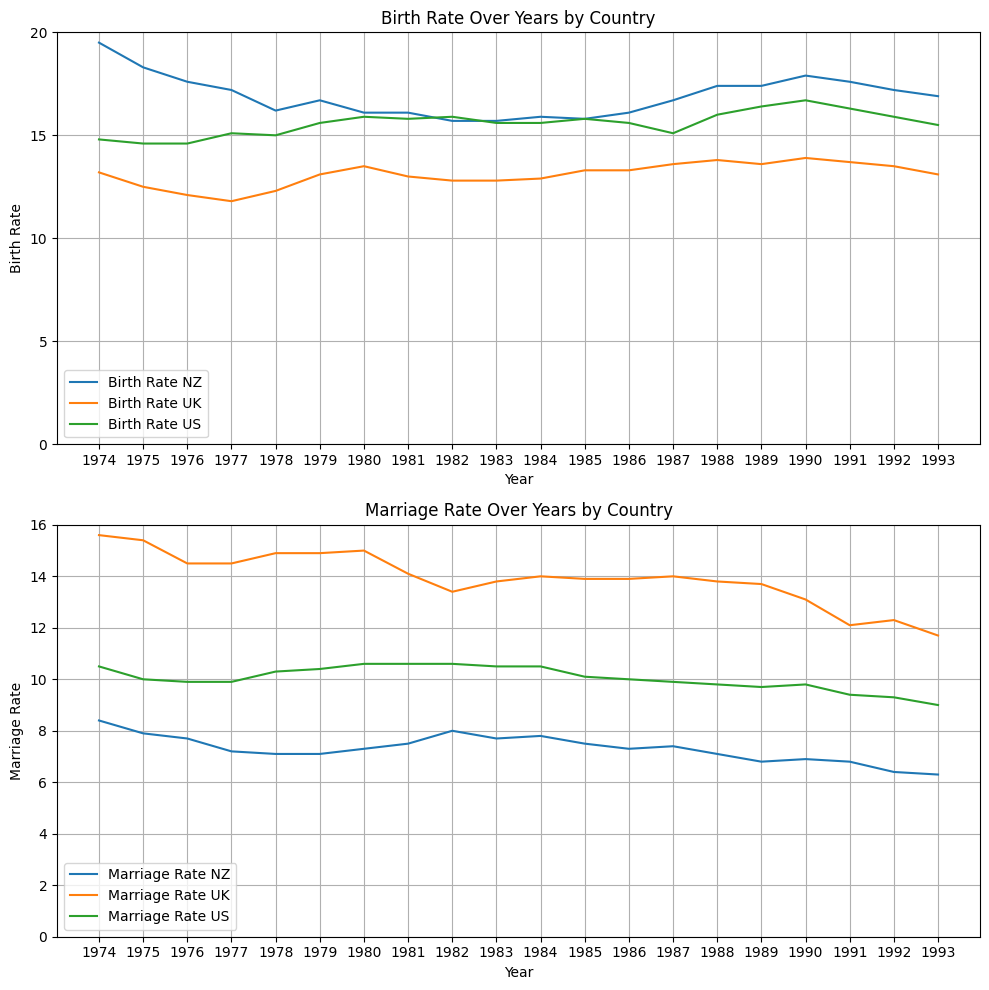

In [60]:

plt.figure(figsize=(10, 10))  # Increase the total figure size

# Plotting Birth Rates for each country in the first subplot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
for country in marriage_birth_rate['Country'].unique():
    country_data = marriage_birth_rate[marriage_birth_rate['Country'] == country]
    plt.plot(country_data['Year'], country_data['Birth rate'], label=f'Birth Rate {country}')
plt.title('Birth Rate Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.xticks(country_data['Year'].unique())  # Ensure ticks are set properly
plt.yticks(range(0, 21, 5))  # Set y-axis from 0 to 20 with 5 as the interval
plt.ylim(0, 20)  # Set y-axis limits
plt.legend()
plt.grid(True)

# Plotting Marriage Rates for each country in the second subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
for country in marriage_birth_rate['Country'].unique():
    country_data = marriage_birth_rate[marriage_birth_rate['Country'] == country]
    plt.plot(country_data['Year'], country_data['Marriage rate'], label=f'Marriage Rate {country}')
plt.title('Marriage Rate Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Marriage Rate')
plt.xticks(country_data['Year'].unique())  # Ensure ticks are set properly
plt.yticks(range(0, 17, 2))  # Set y-axis from 0 to 16 with 2 as the interval
plt.ylim(0, 16)  # Set y-axis limits
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


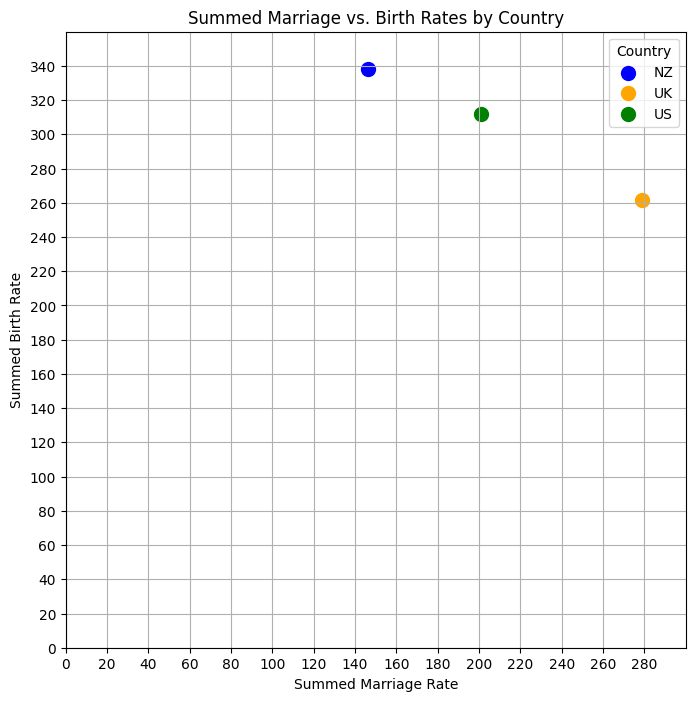

In [76]:

aggregated_data = marriage_birth_rate.groupby('Country').agg({
    'Birth rate': 'sum',
    'Marriage rate': 'sum'
}).reset_index()

# Mapping each country to a color
colors = {'NZ': 'blue', 'US': 'green', 'UK': 'orange'}

# Create the scatter plot
plt.figure(figsize=(8, 8))
for i in range(len(aggregated_data)):
    plt.scatter(aggregated_data['Marriage rate'][i], aggregated_data['Birth rate'][i], color=colors[aggregated_data['Country'][i]], s=100, label=aggregated_data['Country'][i])

# Adding titles and labels
plt.title('Summed Marriage vs. Birth Rates by Country')
plt.xlabel('Summed Marriage Rate')
plt.ylabel('Summed Birth Rate')
plt.grid(True)

# Set axis limits and ticks if needed (you can adjust these as per your specific dataset)
plt.xticks(range(0, 300, 20))  # Adjust the range and intervals based on your actual data
plt.xlim(0, 300)  # Set x-axis limits
plt.yticks(range(0, 360, 20))  # Adjust the range and intervals based on your actual data
plt.ylim(0, 360)  # Set y-axis limits

# Add a legend
plt.legend(title='Country')

# Show the plot
plt.show()


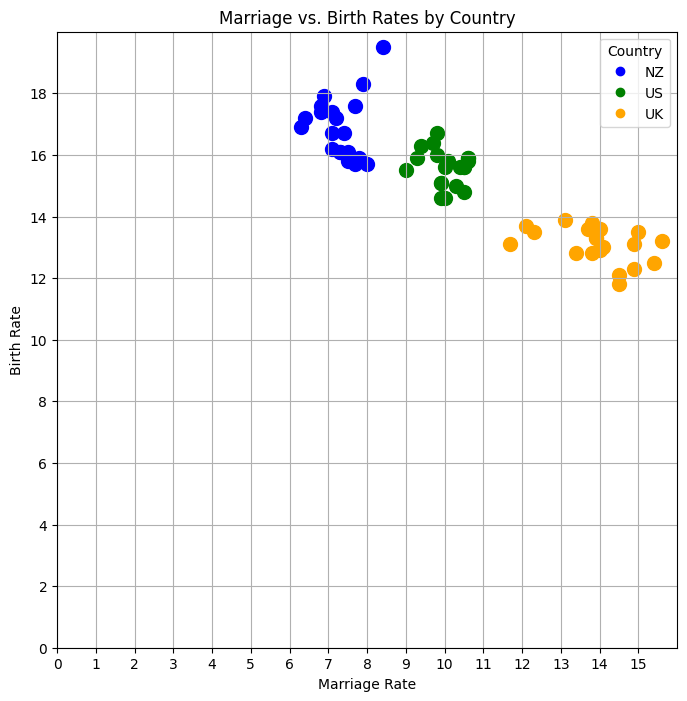

In [74]:

# Mapping each country to a color
colors = {'NZ': 'blue', 'US': 'green', 'UK': 'orange'}

# Create the scatter plot
plt.figure(figsize=(8, 8))
for i in range(len(marriage_birth_rate)):
    plt.scatter(marriage_birth_rate['Marriage rate'][i], marriage_birth_rate['Birth rate'][i], color=colors[marriage_birth_rate['Country'][i]], s=100)
# Adding titles and labels
plt.title('Marriage vs. Birth Rates by Country')
plt.xlabel('Marriage Rate')
plt.ylabel('Birth Rate')


plt.xticks(range(0, 16, 1))  # Set x-axis from 0 to 16 with 2 as the interval
plt.xlim(0, 16)  # Set x-axis limits
plt.yticks(range(0, 20, 2))  # Set y-axis from 0 to 16 with 2 as the interval
plt.ylim(0, 20)  # Set y-axis limits

plt.grid(True)

# Add a legend
plt.legend([plt.Line2D((0,1),(0,0), color=colors[c], marker='o', linestyle='') for c in colors], colors.keys(), title='Country')

# Show the plot
plt.show()


# UK Lung cancer deaths by month for several years

In [167]:
ldeaths=pd.read_excel('/content/ldeaths.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [168]:
ldeaths.head()

,Date,Male,Female,Total
0,1974-01-01,2134,901,3035
1,1974-02-01,1863,689,2552
2,1974-03-01,1877,827,2704
3,1974-04-01,1877,677,2554
4,1974-05-01,1492,522,2014


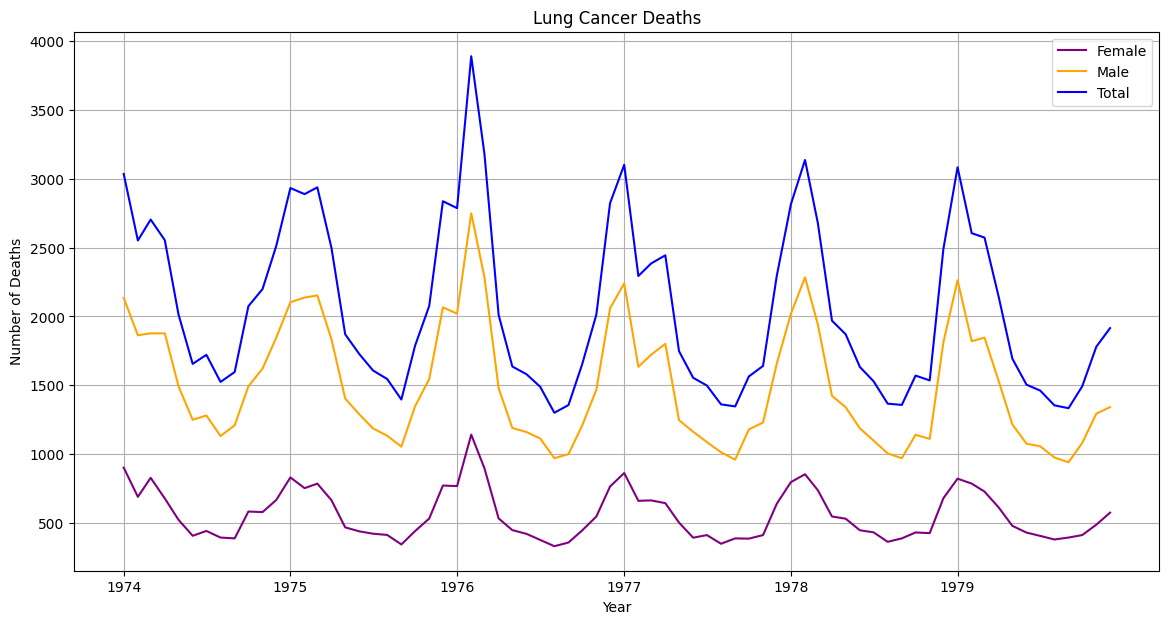

In [169]:
ldeaths['Date'] = pd.to_datetime(ldeaths['Date'])
ldeaths.set_index('Date', inplace=True)

# Ensure 'Year' column for easier manipulation
ldeaths['Year'] = ldeaths.index.year

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(ldeaths.index, ldeaths['Female'], label='Female', color='purple')
plt.plot(ldeaths.index, ldeaths['Male'], label='Male', color='orange')
plt.plot(ldeaths.index, ldeaths['Total'], label='Total', color='blue')

# Get all unique years in the index
years = ldeaths['Year'].unique()

# Create ticks for the first entry of each year in the index
ticks = [ldeaths.index[ldeaths['Year'] == year][0] for year in years]

# Set x-ticks and x-tick labels
plt.xticks(ticks, labels=[str(year) for year in years])  # Convert year to string if needed

# Adding title and labels
plt.title('Lung Cancer Deaths')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


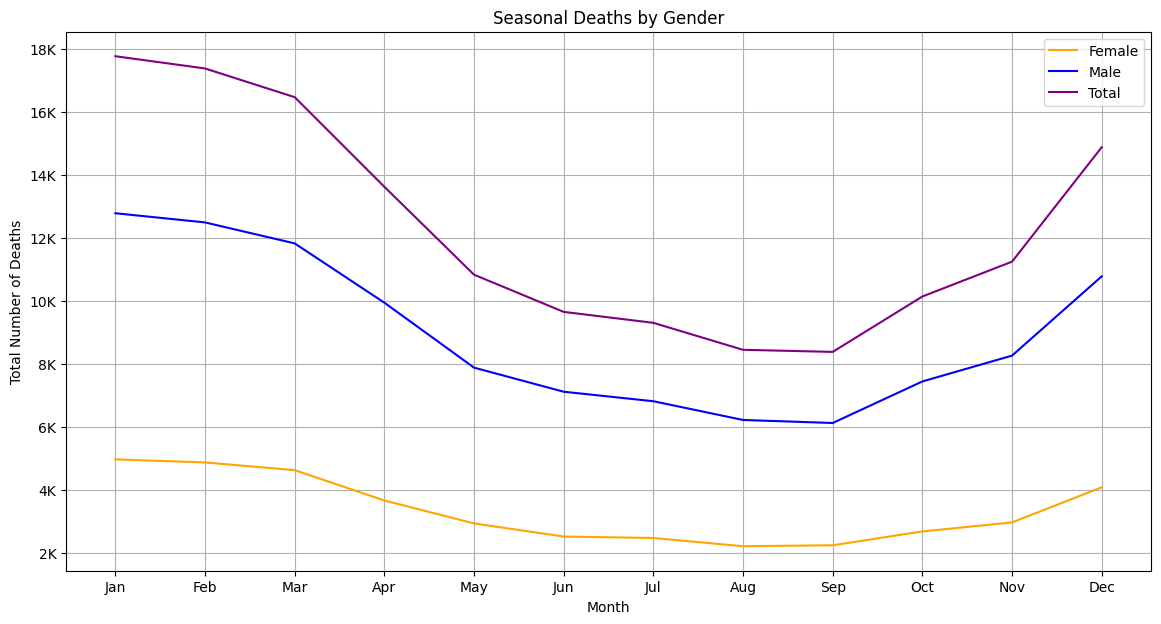

In [170]:
ldeaths['Month'] = ldeaths.index.month

# Aggregate data by month, calculating the sum for each gender across all years
monthly_deaths = ldeaths.groupby('Month').sum()

# Create month labels for the x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(month_labels, monthly_deaths['Female'], label='Female', color='orange')
plt.plot(month_labels, monthly_deaths['Male'], label='Male', color='blue')
plt.plot(month_labels, monthly_deaths['Total'], label='Total', color='purple')

# Formatter function to convert number to string with 'K' as thousand
def thousand_formatter(x, pos):
    return '%1.0fK' % (x * 1e-3)

# Set the formatter function to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousand_formatter))

# Adding title and labels
plt.title('Seasonal Deaths by Gender')
plt.xlabel('Month')
plt.ylabel('Total Number of Deaths')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


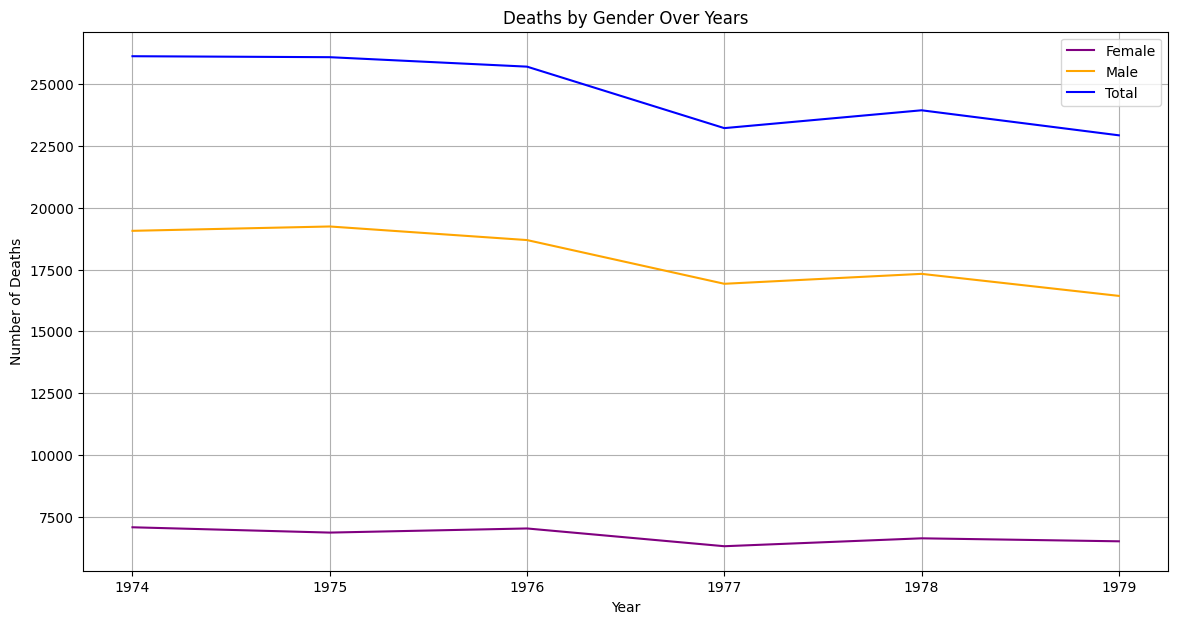

In [171]:
# Resample data by year and sum values
yearly_deaths = ldeaths.resample('Y').sum()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(yearly_deaths.index.year, yearly_deaths['Female'], label='Female', color='purple')
plt.plot(yearly_deaths.index.year, yearly_deaths['Male'], label='Male', color='orange')
plt.plot(yearly_deaths.index.year, yearly_deaths['Total'], label='Total', color='blue')

# Adding title and labels
plt.title('Deaths by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')

# Adding legends
plt.legend()

# Adding grid
plt.grid(True)

# Show the plot
plt.show()


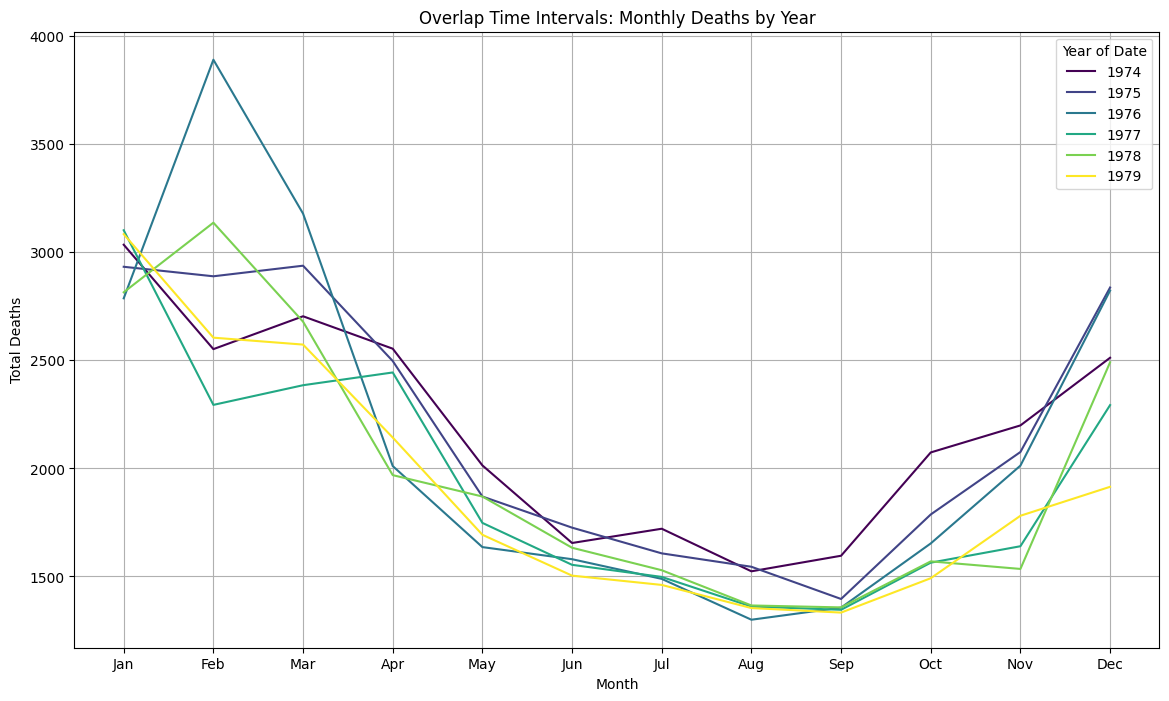

In [172]:
# Pivot the data to have years as columns and months as rows
pivot_table = ldeaths.pivot_table(values='Total', index='Month', columns='Year', aggfunc='sum')
# Create a color map or list if specific colors are needed
colors = plt.cm.viridis(np.linspace(0, 1, len(pivot_table.columns)))

plt.figure(figsize=(14, 8))
for (year, series), color in zip(pivot_table.items(), colors):
    plt.plot(pivot_table.index, series, label=str(year), color=color)

# Set month labels for x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(pivot_table.index, month_labels)

# Add title and labels
plt.title('Overlap Time Intervals: Monthly Deaths by Year')
plt.xlabel('Month')
plt.ylabel('Total Deaths')

# Add a legend
plt.legend(title='Year of Date')

# Show the plot
plt.grid(True)
plt.show()


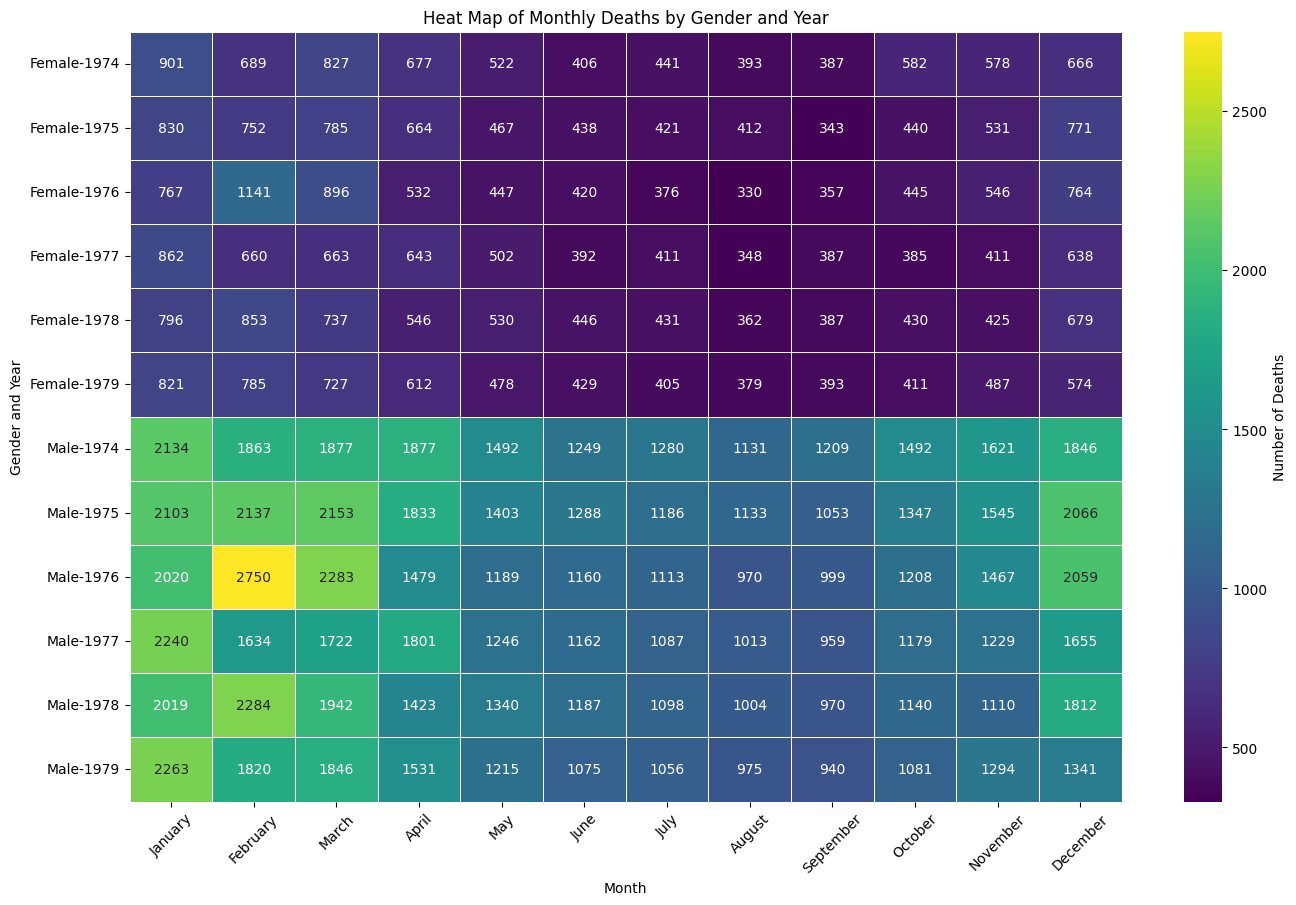

In [173]:
ldeaths['Month'] = ldeaths.index.strftime('%B')  # Full month names

# Stack the 'Female' and 'Male' data into a single column with a categorical identifier for gender
stacked_data = ldeaths[['Female', 'Male']].stack().reset_index()
stacked_data.columns = ['Date', 'Gender', 'Total']  # Adjust column names as needed

# Extract year and month again if needed after stack
stacked_data['Year'] = pd.DatetimeIndex(stacked_data['Date']).year
stacked_data['Month'] = pd.DatetimeIndex(stacked_data['Date']).strftime('%B')

# Sorting by gender explicitly ('Female' first, then 'Male'), then by Year
stacked_data['Gender'] = pd.Categorical(stacked_data['Gender'], ["Female", "Male"])
stacked_data.sort_values(by=['Gender', 'Year'], ascending=[True, True], inplace=True)

# Create a pivot table for the heatmap
pivot_data = stacked_data.pivot_table(values='Total', index=['Gender', 'Year'], columns='Month', aggfunc='sum')

# Ensure the months are in correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_data = pivot_data.reindex(columns=month_order)

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_data, annot=True, fmt="d", cmap='viridis', linewidths=.5, cbar_kws={'label': 'Number of Deaths'})

# Adding labels and title
plt.title('Heat Map of Monthly Deaths by Gender and Year')
plt.xlabel('Month')
plt.ylabel('Gender and Year')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

